In [74]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [75]:
df = pd.read_csv('salary.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [77]:
# заменяем object на int
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
columns = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "salary"]
for column in columns:
    df[column] = lab.fit_transform(df[column])

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


<AxesSubplot:>

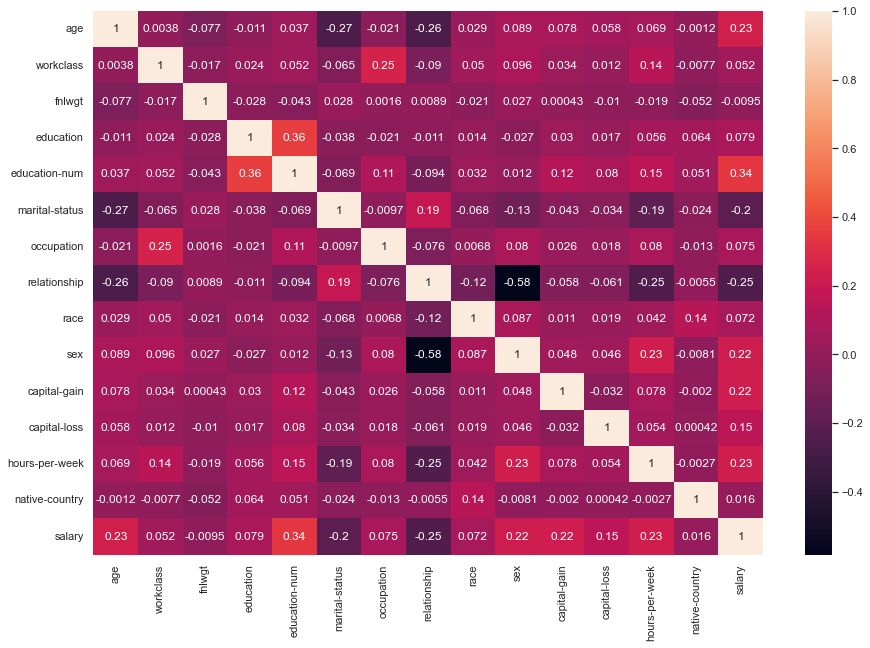

In [78]:
# проверяем степень влияния признаков на целевой
corr_matrix = df.corr()
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(corr_matrix, annot=True)

In [79]:
#проверим, есть ли пропуски
df.isnull().sum(axis = 0).to_frame(name="nans").query("nans > 0")["nans"]

Series([], Name: nans, dtype: int64)

In [80]:
#наиболее влиятельные признаки: age, education-num, sex, capital-gain, capital-loss, hours-per-week
#выделяем из датасета признаки и определяем целевой признак (salary)
# data = df[['age', 'education-num', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']]
data = df
target = df.iloc[:, -1].values

In [81]:
# Стандартизирует функции, удалив среднее значение и масштабируя до единичной дисперсии
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)   # преобразование данных и их стандартизации
np.std(data, axis = 0)          # вычисляем стандартное отклонение вдоль указанной оси

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [82]:
X_train, X_valid, y_train, y_valid = train_test_split(data, target, test_size=0.3, random_state=12)
res = []    # список, где будем хранить результаты работы моделей

Логистическая регрессия выводит прогнозы о точках в бинарном масштабе — нулевом или единичном. Если значение чего-либо равно либо больше 0.5, то объект классифицируется в большую сторону (к единице). Если значение меньше 0.5 — в меньшую (к нулю).

У каждого признака есть своя метка, равная только 0 или только 1. Логистическая регрессия является линейным классификатором и поэтому используется, когда в данных прослеживается какая-то линейная зависимость.

In [83]:
clf_lr = LogisticRegression().fit(X_train, y_train)
sc = clf_lr.score(X_valid, y_valid)
print(sc)
res.append(('LogisticRegression', sc))

1.0


Этот классификатор разбивает данные на всё меньшие и меньшие подмножества на основе разных критериев, т. е. у каждого подмножества своя сортирующая категория. С каждым разделением количество объектов определённого критерия уменьшается.

Классификация подойдёт к концу, когда сеть дойдёт до подмножества только с одним объектом.

In [84]:
clf_dt = DecisionTreeClassifier().fit(X_train, y_train)

sc = clf_dt.score(X_valid, y_valid)
print(sc)
res.append(('DecisionTreeClassifier', sc))

1.0


Работа метода опорных векторов заключается в рисовании линии между разными кластерами точек, которые нужно сгруппировать в классы. С одной стороны линии будут точки, принадлежащие одному классу, с другой стороны — к другому классу.

Классификатор будет пытаться увеличить расстояние между рисуемыми линиями и точками на разных сторонах, чтобы увеличить свою «уверенность» определения класса. Когда все точки построены, сторона, на которую они падают — это класс, которому эти точки принадлежат.

In [85]:
clf_svc = SVC().fit(X_train, y_train)

sc = clf_svc.score(X_valid, y_valid)
print(sc)
res.append(('SVC', sc))

0.9998976353772137


Этот метод работает с помощью поиска кратчайшей дистанции между тестируемым объектом и ближайшими к нему классифицированным объектами из обучающего набора. Классифицируемый объект будет относится к тому классу, к которому принадлежит ближайший объект набора.

In [86]:
clf_knn = KNeighborsClassifier().fit(X_train, y_train)

sc = clf_knn.score(X_valid, y_valid)
print(sc)
res.append(('KNeighborsClassifier', sc))

0.998055072167059


Применим стекинг

In [87]:
#1
from sklearn.ensemble import StackingClassifier

estimators = [ ('dt', DecisionTreeClassifier()), ('knn', KNeighborsClassifier())]
clf_stacking = StackingClassifier(estimators=estimators, final_estimator=SVC())

clf_stacking.fit(X_train, y_train)
sc = clf_stacking.score(X_valid, y_valid)
print(sc)
res.append(('StackingClassifier: dt knn', sc))

1.0


In [88]:
#2
from sklearn.ensemble import StackingClassifier

estimators = [('knn', KNeighborsClassifier()), ('dt', DecisionTreeClassifier())]
clf_stacking = StackingClassifier(estimators=estimators, final_estimator=SVC())

clf_stacking.fit(X_train, y_train)
sc = clf_stacking.score(X_valid, y_valid)
print(sc)
res.append(('StackingClassifier: knn dt', sc))

1.0


In [89]:
#1
estimators = [('lr', LogisticRegression()), ('dt', DecisionTreeClassifier()), ('knn', KNeighborsClassifier())]
clf_stacking = StackingClassifier(estimators=estimators, final_estimator=SVC())

clf_stacking.fit(X_train, y_train)
sc = clf_stacking.score(X_valid, y_valid)
print(sc)
res.append(('StackingClassifier: lr dt knn', sc))

1.0


In [90]:

#2
estimators = [('dt', DecisionTreeClassifier()), ('lr', LogisticRegression()), ('knn', KNeighborsClassifier())]
clf_stacking = StackingClassifier(estimators=estimators, final_estimator=SVC())

clf_stacking.fit(X_train, y_train)
sc = clf_stacking.score(X_valid, y_valid)
print(sc)
res.append(('StackingClassifier: dt lr knn', sc))

1.0


In [91]:
#3
estimators = [('knn', KNeighborsClassifier()), ('lr', LogisticRegression()), ('dt', DecisionTreeClassifier())]
clf_stacking = StackingClassifier(estimators=estimators, final_estimator=SVC())

clf_stacking.fit(X_train, y_train)
sc = clf_stacking.score(X_valid, y_valid)
print(sc)
res.append(('StackingClassifier: knn lr dt', sc))

1.0


In [92]:
estimators = [('lr', LogisticRegression()), ('dt', DecisionTreeClassifier())]
clf_stacking = StackingClassifier(estimators=estimators, final_estimator=SVC())

clf_stacking.fit(X_train, y_train)
sc = clf_stacking.score(X_valid, y_valid)
print(sc)
res.append(('StackingClassifier: lr dt', sc))

1.0


In [93]:
estimators = [('lr', LogisticRegression()), ('knn', KNeighborsClassifier())]
clf_stacking = StackingClassifier(estimators=estimators, final_estimator=SVC())

clf_stacking.fit(X_train, y_train)
sc = clf_stacking.score(X_valid, y_valid)
print(sc)
res.append(('StackingClassifier: lr knn', sc))

1.0


Беггинг

In [94]:
from sklearn.ensemble import BaggingClassifier

score = []
for i in range(1, 10):
    clf_bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=i, random_state=12)
    clf_bag.fit(X_train, y_train)
    score.append((clf_bag.score(X_valid, y_valid), i))
## При разном количестве n_estimators получаем разные результаты
## n_estimators = 4 : 0.9181
for i in range(10, 160, 10):
    clf_bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=i, random_state=12)
    clf_bag.fit(X_train, y_train)
    score.append((clf_bag.score(X_valid, y_valid), i))
print(*score[0:5], sep = '\n')
print(*score[10], sep = '\n')
print()
print('n_estimators  clf_bag.score')
mx = max(score, key=lambda x: (x[0], -x[1]))
print(mx[1], ' '*5, mx[0])
sc = mx[0]
print(sc)
res.append(('BaggingClassifier: dt', sc))

(1.0, 1)
(1.0, 2)
(1.0, 3)
(1.0, 4)
(1.0, 5)
1.0
20

n_estimators  clf_bag.score
1       1.0
1.0


In [95]:
score = []
print('n_estimators  clf_bag.score')
for i in range(1, 10):
    clf_bag = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=i, random_state=12)
    clf_bag.fit(X_train, y_train)
    score.append((clf_bag.score(X_valid, y_valid), i))
for i in range(10, 100, 10):
    clf_bag = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=i, random_state=12, n_jobs=-1)
    clf_bag.fit(X_train, y_train)
    score.append((clf_bag.score(X_valid, y_valid), i))
mx = max(score, key=lambda x: (x[0], -x[1]))
print(mx[1], ' '*5, mx[0])
sc = mx[0]
print(sc)
res.append(('BaggingClassifier: lr', sc))

n_estimators  clf_bag.score
1       1.0
1.0


RandomForest - случайный лес

In [96]:
clf_rf= RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=12)
clf_rf.fit(X_train, y_train)
sc = clf_rf.score(X_valid, y_valid)
print(sc)
res.append(('RandomForestClassifier', sc))

1.0


In [97]:
clf_rf= RandomForestClassifier(n_estimators=10, max_depth=3, min_samples_split=2, random_state=12)
clf_rf.fit(X_train, y_train)
sc = clf_rf.score(X_valid, y_valid)
print(sc)
res.append(('RandomForestClassifier 3', sc))

1.0


In [98]:
clf_rf= RandomForestClassifier(n_estimators=10, max_depth=10, min_samples_split=2, random_state=12)
clf_rf.fit(X_train, y_train)
sc = clf_rf.score(X_valid, y_valid)
print(sc)
res.append(('RandomForestClassifier 10', sc))

1.0


ExtraTrees - черезвычайно рандомизированные деревья

In [99]:
clf_ext = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=12)
clf_ext.fit(X_train, y_train)
sc = clf_ext.score(X_valid, y_valid)
print(sc)
res.append(('ExtraTreesClassifier', sc))

1.0


In [100]:
# max_depth = 20
clf_ext = ExtraTreesClassifier(n_estimators=10, max_depth=20, min_samples_split=2, random_state=12)
clf_ext.fit(X_train, y_train)
sc = clf_ext.score(X_valid, y_valid)
print(sc)
res.append(('ExtraTreesClassifier 20', sc))

1.0


Бустинг

адаптивный бустинг

In [101]:
dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
print(dt.score(X_valid, y_valid))

1.0


In [102]:
dt = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
print(dt.score(X_valid, y_valid))

1.0


In [103]:
dt = DecisionTreeClassifier(max_depth=10).fit(X_train, y_train)
print(dt.score(X_valid, y_valid))

1.0


In [104]:
dt = DecisionTreeClassifier(max_depth=20).fit(X_train, y_train)
print(dt.score(X_valid, y_valid))

1.0


In [105]:
from sklearn.ensemble import AdaBoostClassifier

clf_adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=12)

clf_adaboost.fit(X_train, y_train)
sc = clf_adaboost.score(X_valid, y_valid)
print(sc)
res.append(('AdaBoostClassifier: dt2', sc))

1.0


In [106]:
from sklearn.ensemble import AdaBoostClassifier

clf_adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), n_estimators=100, random_state=12)

clf_adaboost.fit(X_train, y_train)
sc = clf_adaboost.score(X_valid, y_valid)
print(sc)
res.append(('AdaBoostClassifier: dt10', sc))

1.0


градиентный бустинг

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

clf_grboost = GradientBoostingClassifier(max_depth=2, n_estimators=100, random_state=12, learning_rate=1)
clf_grboost.fit(X_train, y_train)
sc = clf_grboost.score(X_valid, y_valid)
print(sc)
res.append(('GradientBoostingClassifier 2', sc))

1.0


In [108]:
from sklearn.ensemble import GradientBoostingClassifier

clf_grboost = GradientBoostingClassifier(max_depth=10, n_estimators=100, random_state=12, learning_rate=1)
clf_grboost.fit(X_train, y_train)
sc = clf_grboost.score(X_valid, y_valid)
print(sc)
res.append(('GradientBoostingClassifier 10', sc))

1.0


In [109]:
print("         Результаты ")
for x, y in res:
    print(x+' '*(30-len(x)), y)

         Результаты 
LogisticRegression             1.0
DecisionTreeClassifier         1.0
SVC                            0.9998976353772137
KNeighborsClassifier           0.998055072167059
StackingClassifier: dt knn     1.0
StackingClassifier: knn dt     1.0
StackingClassifier: lr dt knn  1.0
StackingClassifier: dt lr knn  1.0
StackingClassifier: knn lr dt  1.0
StackingClassifier: lr dt      1.0
StackingClassifier: lr knn     1.0
BaggingClassifier: dt          1.0
BaggingClassifier: lr          1.0
RandomForestClassifier         1.0
RandomForestClassifier 3       1.0
RandomForestClassifier 10      1.0
ExtraTreesClassifier           1.0
ExtraTreesClassifier 20        1.0
AdaBoostClassifier: dt2        1.0
AdaBoostClassifier: dt10       1.0
GradientBoostingClassifier 2   1.0
GradientBoostingClassifier 10  1.0
